# Pathways

## Imports

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import rcParams

## Code

Define figure dimensions:

In [2]:
fig_width_2col_mm = 180 # double column width for Nature Comms
fig_width_2col_inches = fig_width_2col_mm / 25.4
fig_height_inches = 0.7 * fig_width_2col_inches

Define default plot settings:

In [3]:
rcParams['figure.autolayout'] = True
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 8
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

Make a function for the subplots:

In [4]:
def make_subplot(ax: plt.Axes, title: str, mu: float, sigma: float, lsl: float, usl: float):
    """Make a subplot with a normal distribution and specification limits.

    Parameters
    ----------
    ax : plt.Axes
        Subplot axes.
    title : str
        Subplot title.
    mu : float
        Mean of the distribution.
    sigma : float
        Standard deviation of the distribution.
    lsl : float
        Lower specification limit.
    usl : float
        Upper specification limit.
    """
    # Define the normal distribution
    x = np.linspace(mu - 6 * sigma, mu + 6 * sigma, 1000)
    y = norm.pdf(x, loc=mu, scale=sigma)
    
    # Calculate the total defective percentage
    total_defective_percent = 100 * (np.sum(y[x < lsl]) + np.sum(y[x > usl])) / np.sum(y)
    
    # Plot
    ax.plot(x, y)
    ax.set_title(title + f"\n{total_defective_percent:.1f}% defective", loc="left")
    
    # Plot specification limits
    ax.axvline(x=lsl, color="r", linestyle="--")
    ax.axvline(x=usl, color="r", linestyle="--")
    ax.annotate(f"LSL={lsl:.0f} µm", (lsl, 0.0043), color="r", ha="right", rotation=90)
    ax.annotate(f"USL={usl:.0f} µm", (usl + 105, 0.0043), color="r", ha="right", rotation=90)
    
    # Color the area outside the specification limits
    ax.fill_between(
        x=x,
        y1=y, 
        where=(x < lsl) | (x > usl),
        color="tab:green" if "inspection" in title else "tab:red",
    )
    
    # We want the y-axis to start at 0
    ax.set_ylim(bottom=0, top = 0.008)
    
    # Remove ticks and tick labels
    ax.tick_params(left = False, right = False, labelleft = False)
    ax.set_xticks(np.arange(0, 1001, 250))

Mini function for drawing arrows:

In [5]:
def draw_arrow(ax, x, y, dx, dy, color):
    """Draw an arrow on a plot."""
    ax.arrow(x, y, dx, dy, fc=color, ec=color, width=0.00006, head_length=15)

Plot:

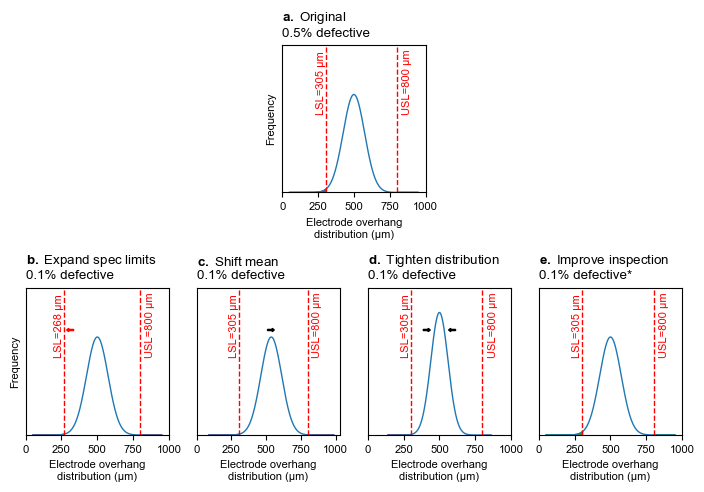

In [6]:
plt.figure(figsize=(fig_width_2col_inches, fig_height_inches))
grid = plt.GridSpec(2, 8)

ax0 = plt.subplot(grid[0, 3:5])
ax1 = plt.subplot(grid[1, 0:2])
ax2 = plt.subplot(grid[1, 2:4])
ax3 = plt.subplot(grid[1, 4:6])
ax4 = plt.subplot(grid[1, 6:8])

make_subplot(ax0, "$\\bf{a.}$ Original", mu=500, sigma=75, lsl=305, usl=800)
make_subplot(ax1, "$\\bf{b.}$ Expand spec limits", mu=500, sigma=75, lsl=268, usl=800)
make_subplot(ax2, "$\\bf{c.}$ Shift mean", mu=537, sigma=75, lsl=305, usl=800)
make_subplot(ax3, "$\\bf{d.}$ Tighten distribution", mu=500, sigma=60, lsl=305, usl=800)
make_subplot(ax4, "$\\bf{e.}$ Improve inspection", mu=500, sigma=75, lsl=305, usl=800)

draw_arrow(ax1, 335, 0.0057, -33.75, 0, "r")
draw_arrow(ax2, 510, 0.0057, 33.75, 0, "k")
draw_arrow(ax3, 387.5, 0.0057, 33.75, 0, "k")
draw_arrow(ax3, 612.5, 0.0057, -33.75, 0, "k")

ax1.set_xticks(np.arange(0, 1001, 250))
ax2.set_xticks(np.arange(0, 1001, 250))
ax3.set_xticks(np.arange(0, 1001, 250))

ax0.set_xlabel("Electrode overhang\ndistribution (µm)")
ax1.set_xlabel("Electrode overhang\ndistribution (µm)")
ax2.set_xlabel("Electrode overhang\ndistribution (µm)")
ax3.set_xlabel("Electrode overhang\ndistribution (µm)")
ax4.set_xlabel("Electrode overhang\ndistribution (µm)")

ax0.set_ylabel("Frequency")
ax1.set_ylabel("Frequency")

# Hardcode to change percentage and add asterisk
ax4.set_title("$\\bf{e.}$ Improve inspection\n0.1% defective*", loc="left")

plt.tight_layout()
plt.savefig("pathways.pdf", dpi=300, bbox_inches="tight", format="pdf")